## Intro to Project

In this project you will work on predicting the mean temperature in London

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [181]:
# Read the data
df = pd.read_csv('../data/london_weather.csv')

df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Checking Data Type

In [182]:
# Check for data types
print("Data Types:")
print(df.dtypes)

Data Types:
date                  int64
cloud_cover         float64
sunshine            float64
global_radiation    float64
max_temp            float64
mean_temp           float64
min_temp            float64
precipitation       float64
pressure            float64
snow_depth          float64
dtype: object


## Converting to DateTime

In [183]:
# Convert the date column to datetime with the format YYYY-MM-DD
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


In [184]:
# Remove the date column and store the entire dataframe in a new variable called df2
df2 = df.drop(columns=['date'])

# Set the datetime column as the index
df2.set_index('datetime', inplace=True)

df2.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Handling Missing Values

Missing Values:
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64
--------------------
Missing Values (%):
cloud_cover         0.123851
sunshine            0.000000
global_radiation    0.123851
max_temp            0.039111
mean_temp           0.234665
min_temp            0.013037
precipitation       0.039111
pressure            0.026074
snow_depth          9.393130
dtype: float64
--------------------


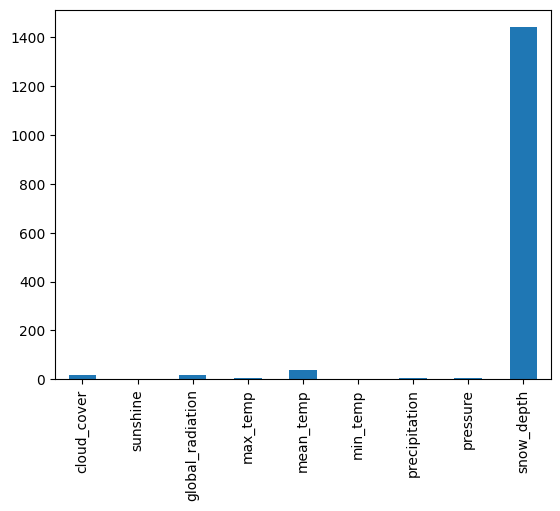

In [185]:
# Count the number of missing values in each column
print("Missing Values:")
print(df2.isnull().sum())

print("--------------------")
# Calculate the percentage of missing values in each column
print("Missing Values (%):")
print(df2.isnull().sum() / len(df2) * 100)

print("--------------------")
# Plot the missing values in df2 using a bar chart
df2.isnull().sum().plot(kind='bar')
plt.show()


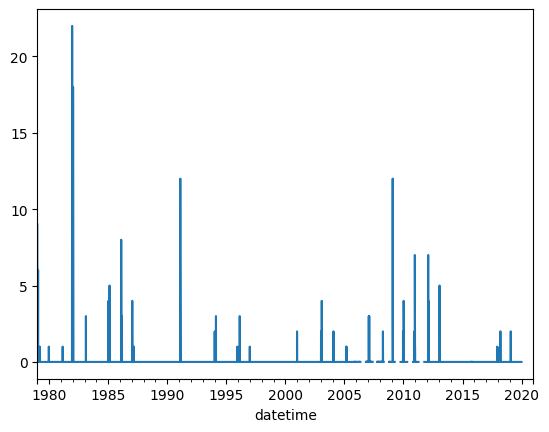

In [186]:
# Plot the snow_depth column using a line chart
df2['snow_depth'].plot(kind='line')
plt.show()

In [187]:
# Fill the missing values in all columns using the mean of each column and store the result in a new dataframe called df3
df3 = df2.fillna(df2.mean())

# Count the number of missing values in each column of df3
print("Missing Values:")
print(df3.isnull().sum())

Missing Values:
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64


## Exporatory Data Analysis

In [188]:
# Print df3 for the first 5 rows
df3.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [189]:
df3.describe()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000
mean,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,2.068790,4.028339,88.843200,6.553472,5.722981,5.326409,3.737809,1049.585735,0.519373
min,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,4.000000,0.500000,41.000000,10.500000,7.100000,3.500000,0.000000,100920.000000,0.000000
50%,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


### Getting the Correlation of Mean Tempeurature

([<matplotlib.axis.YTick at 0x7f9604277a60>,
 [Text(0, 0, 'cloud_cover'),
  Text(0, 1, 'sunshine'),
  Text(0, 2, 'global_radiation'),
  Text(0, 3, 'max_temp'),
  Text(0, 4, 'mean_temp'),
  Text(0, 5, 'min_temp'),
  Text(0, 6, 'precipitation'),
  Text(0, 7, 'pressure'),
  Text(0, 8, 'snow_depth')])

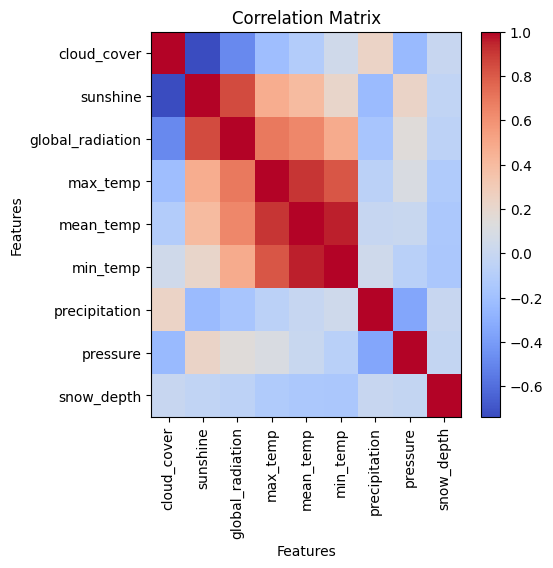

In [190]:
# Perform correlation analysis on df3 using the .corr() method and plot a heatmap of the results
corr = df3.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(5, 5))
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.imshow(corr, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)


In [191]:
# Store the correlation values of mean_temp column in a new variable called corr_mean_temp
corr_mean_temp = corr['mean_temp']
corr_mean_temp = corr_mean_temp.sort_values(ascending=False)
# Print the correlation values
print(corr_mean_temp)

mean_temp           1.000000
min_temp            0.954532
max_temp            0.911442
global_radiation    0.633862
sunshine            0.396130
pressure            0.004758
precipitation      -0.010455
cloud_cover        -0.110273
snow_depth         -0.147051
Name: mean_temp, dtype: float64


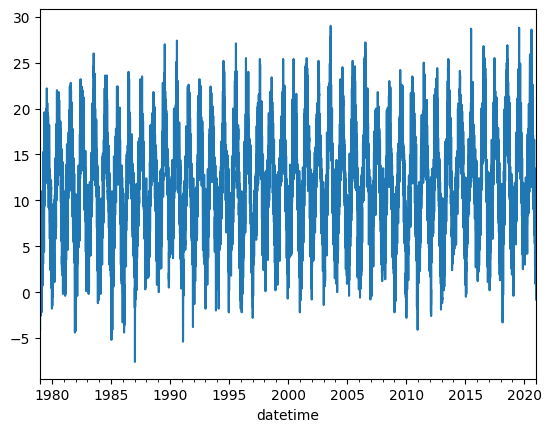

In [192]:
# Plot a line chart of mean_temp
df3['mean_temp'].plot(kind='line')
plt.show()

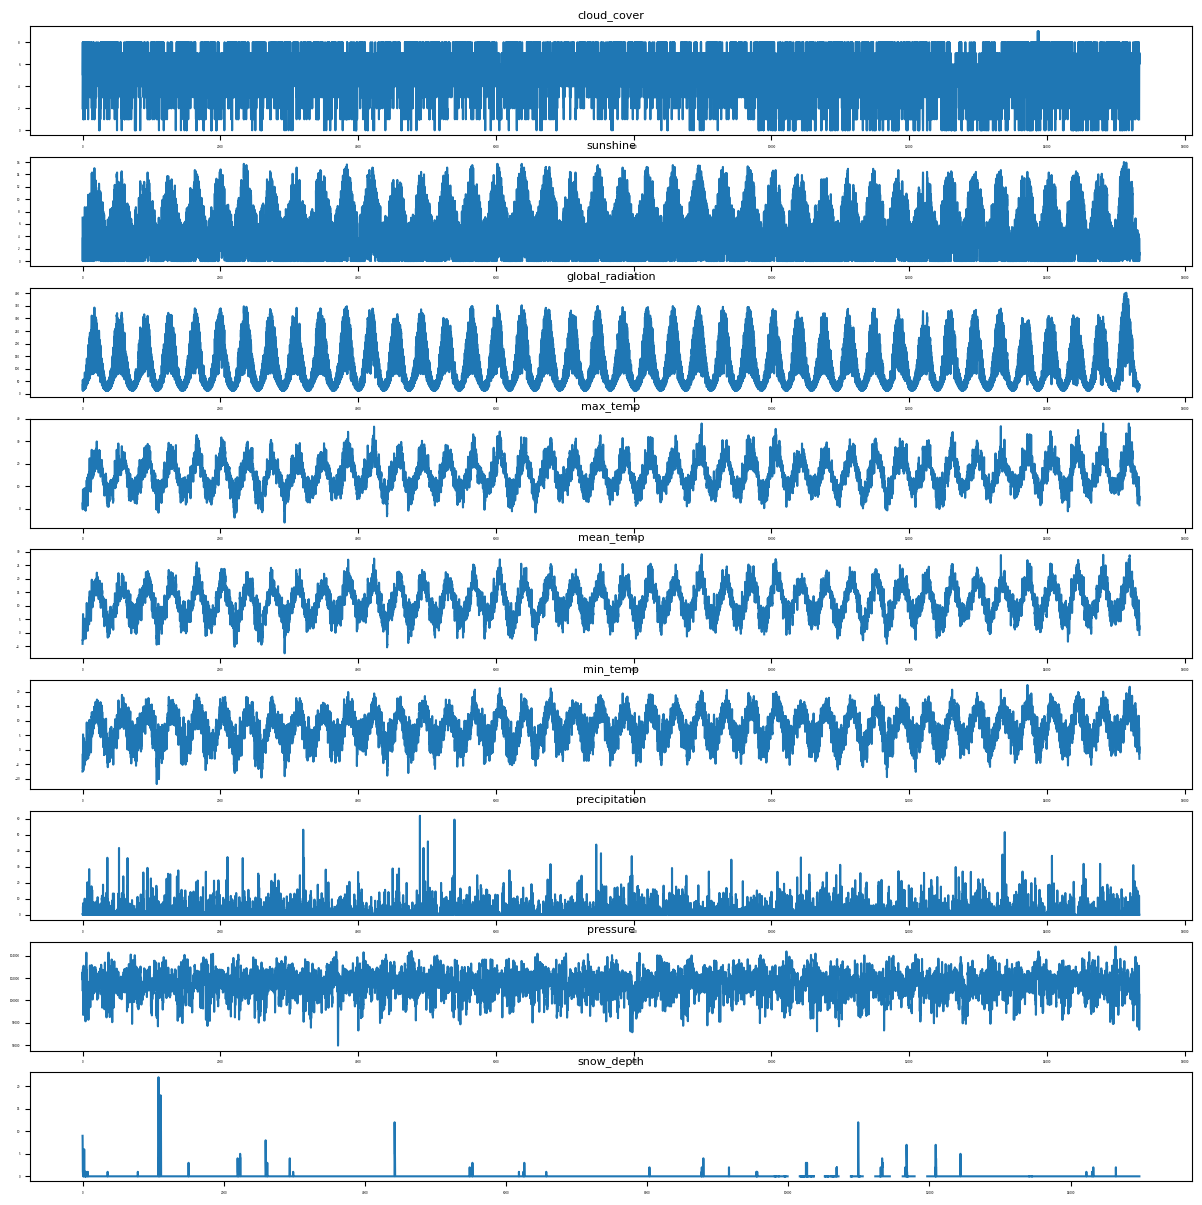

In [193]:
# Get the number of columns in the DataFrame
num_rows = len(df3.columns)

# Define the number of rows and columns for subplots
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array if it's a 2D array
axes = axes.flatten()

# Loop through each column and create subplots
for i, column in enumerate(df3.columns):
    # Use the 'i' index to access the correct subplot
    ax = axes[i]
    # Plot the data
    ax.plot(df[column])
    # Set subplot title
    ax.set_title(column)
    ax.title.set_size(8)
    # Make the ticks smaller
    ax.tick_params(labelsize=2)

In [194]:
# Group df3 by year
df3_year = df3.groupby(df3.index.year).mean()

# Group df3 by month
df3_month = df3.groupby(df3.index.month).mean()


### Analysing the Mean Temperature

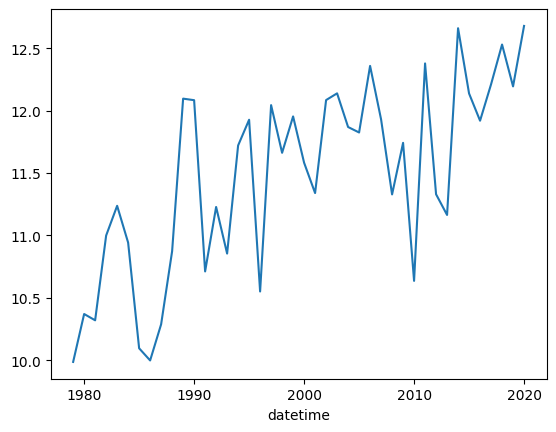

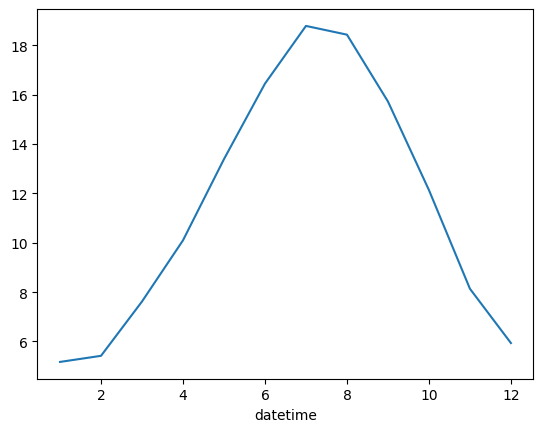

In [195]:
# From df3_year, plot the mean_temp column using a line chart
df3_year['mean_temp'].plot(kind='line')
plt.show()

# From df3_month, plot the mean_temp column using a line chart
df3_month['mean_temp'].plot(kind='line')
plt.show()

### Analysing the Global Radiation

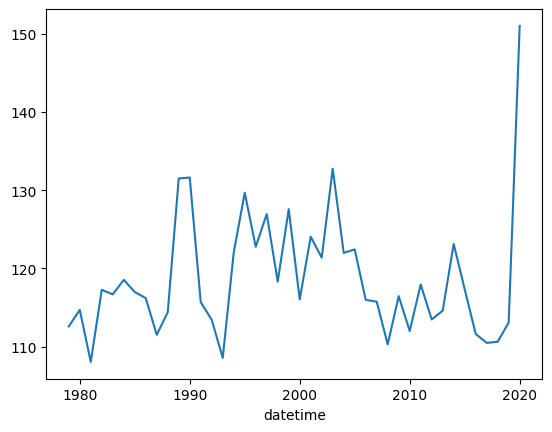

<Axes: xlabel='datetime'>

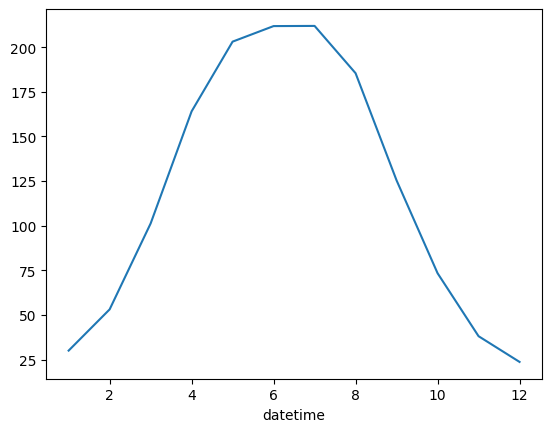

In [196]:
# From df3_year, plot the global radiation column using a line chart
df3_year['global_radiation'].plot(kind='line')
plt.show()

# From df3_month, plot the global radiation column using a line chart
df3_month['global_radiation'].plot(kind='line')

### Analysing the Precipitation

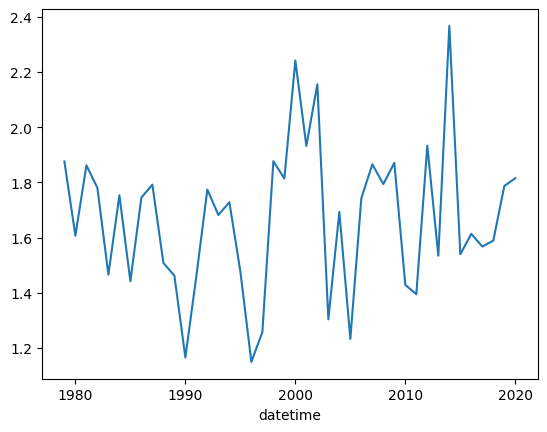

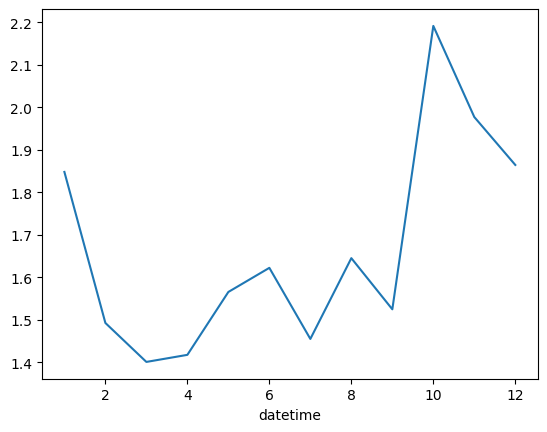

In [197]:
# From df3_year, plot the precipitation column using a line chart
df3_year['precipitation'].plot(kind='line')
plt.show()

# From df3_month, plot the precipitation column using a line chart
df3_month['precipitation'].plot(kind='line')
plt.show()

### Analysing the Snow Depth

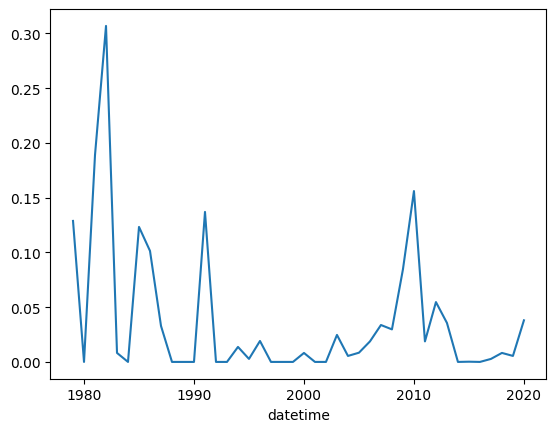

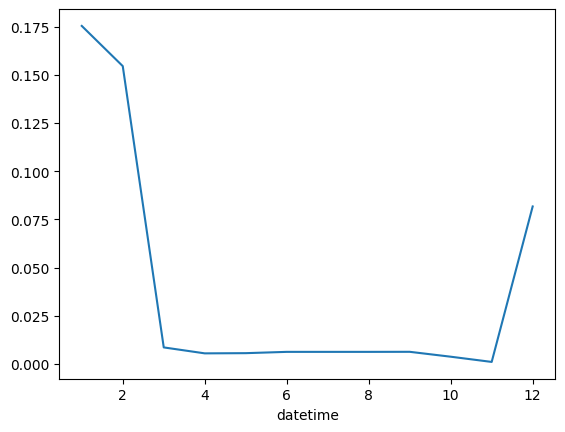

In [198]:
# From df3_year, plot the snow_depth column using a line chart
df3_year['snow_depth'].plot(kind='line')
plt.show()

# From df3_month, plot the snow_depth column using a line chart
df3_month['snow_depth'].plot(kind='line')
plt.show()

### Analysing the Sunshine

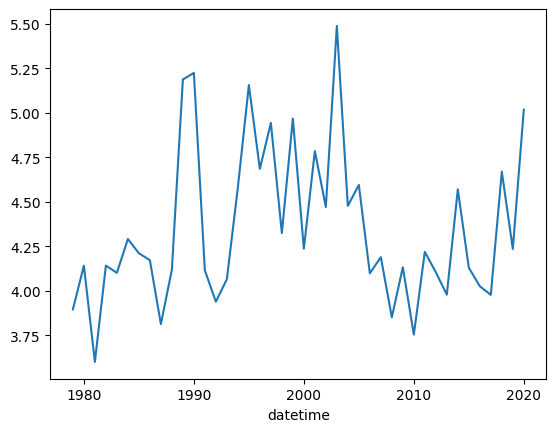

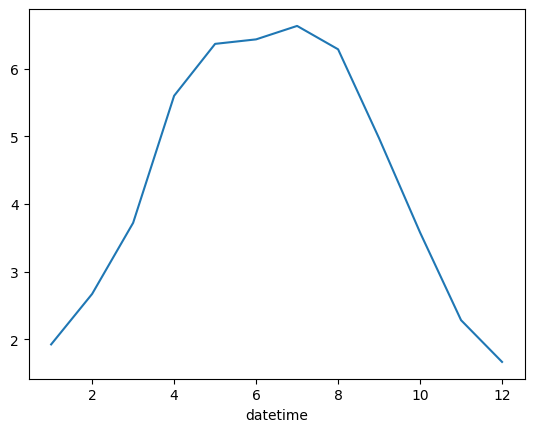

In [199]:
# From df3_year, plot the sunshine column using a line chart
df3_year['sunshine'].plot(kind='line')
plt.show()

# From df3_month, plot the sunshine column using a line chart
df3_month['sunshine'].plot(kind='line')
plt.show()


## Training the Model

In [200]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


def preprocess_df(df, feature_selection, target_var):
    df = df.dropna(subset=[target_var])
    X = df[feature_selection]
    y = df[target_var]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=1
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test


feature_selection = [
    "global_radiation",
    "sunshine",
    "pressure",
    "precipitation",
    "cloud_cover",
    "snow_depth",
]
target_var = "mean_temp"
X_train, X_test, y_train, y_test = preprocess_df(df3, feature_selection, target_var)

RMSE: 4.039259910037574


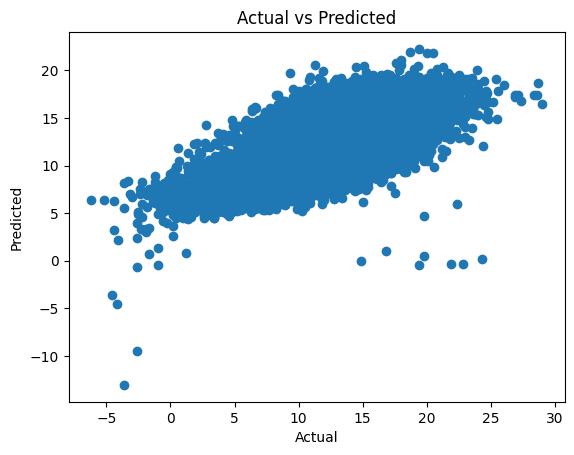

In [201]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
# Create a LinearRegression instance
lr = LinearRegression()
# Fit the LinearRegression model on the training data
lr.fit(X_train, y_train)

# Predcit the values using the test data
y_pred = lr.predict(X_test)

# Calculate the RMSE score
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 869
[LightGBM] [Info] Number of data points in the train set: 10278, number of used features: 6
[LightGBM] [Info] Start training from score 11.468757
RMSE: 3.7025388037033755


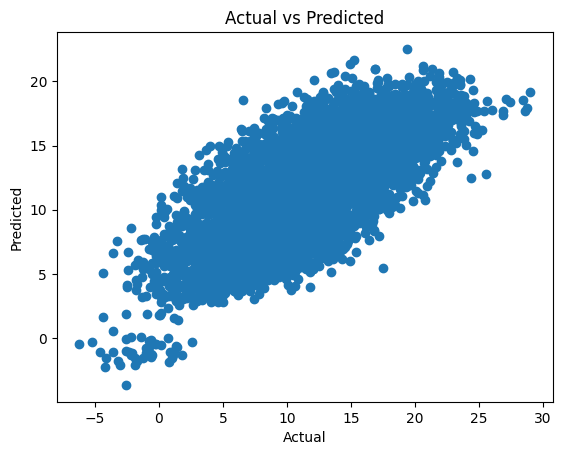

In [202]:
# Import lightgbm
import lightgbm as lgb

# Create a lgb.LGBMRegressor
lgbm = lgb.LGBMRegressor()
# Fit the LightGBM model on the training data
lgbm.fit(X_train, y_train)

# Predict the values using the test data
y_pred = lgbm.predict(X_test)

# Calculate the RMSE score
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Hyperparameter Tuning

In [204]:
# Tune the hyperparameters of the LightGBM model
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters to search
grid = {
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [20, 50, 100, 200]
}

# Create a GridSearchCV instance
grid_cv = GridSearchCV(estimator=lgbm, param_grid=grid, cv=10)

# Fit the GridSearchCV instance to the training data
grid_cv.fit(X_train, y_train)

# Get the best hyperparameters
print(grid_cv.best_params_)

# Get the best model
best_model = grid_cv.best_estimator_

# Predict the values using the test data
y_pred = best_model.predict(X_test)

# Calculate the RMSE score
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 9250, number of used features: 6
[LightGBM] [Info] Start training from score 11.473801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 9250, number of used features: 6
[LightGBM] [Info] Start training from score 11.450982
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 925

### Using SHAP to Explain the Model

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


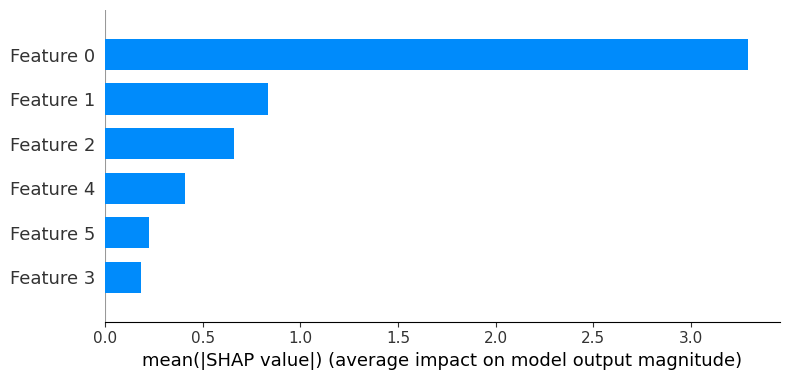

In [205]:
# use ShAP to explain the predictions
import shap

# Create a TreeExplainer instance
explainer = shap.TreeExplainer(best_model)
# Calculate the shap_values for the test data
shap_values = explainer.shap_values(X_test)
# Plot the SHAP values for the test data
shap.summary_plot(shap_values, X_test, plot_type='bar')
plt.show()